# Vulture V.01

THE IMPACT OF COVID CASES AND THE TWEETS OF WHO ON GAMING INDUSTRY DURING THE COVID-19 PANDEMIC
Questions:
Q1: How did negative and positive toned the tweets of WHO affect the adj prices of top gaming companies in Canada and USA?


Q1.1: Why did I decide to go with WHO tweets of others?

A1.1: There is a valuable public trust in WHO:
https://betterworldcampaign.org/press-release/poll-coronavirus-world-health-organization
"A new poll conducted by Morning Consult for the Better World Campaign found that when it comes to managing the response to international health crises like coronavirus (COVID-19), three quarters of Americans (77 percent) trust the World Health Organization (WHO), above all other entities tested."

A1.2:
https://www150.statcan.gc.ca/n1/daily-quotidien/200626/dq200626b-eng.htm
"Most crowdsourcing participants express high levels of trust in public health authorities and governments

Crowdsourcing participants were asked how much they trust federal, provincial, territorial and municipal health authorities to make good decisions about when and how to reopen workplaces and public spaces. Two-thirds (65%) expressed high levels of trust in municipal health authorities and three-quarters (74%) expressed high trust in provincial or territorial and federal health authorities, again defined as responses of 4 or 5."


STEPS


1- DAILY STOCK PRICES AND INDEX

I will use the Finance Yahoo in order to download the price returns and indexes of gaming companies via ticker list and indices list
I am planning to add mobile gaming companies which produce content for Mobile Phones such as Gameloft, which was the sister company of Ubisoft before purchased by Vivendi 

Here are the companies that I can use:
https://www.softwaretestinghelp.com/game-development-companies/
https://inspiringcanadians.com/2021/12/29/top-10-gaming-companies-in-canada/

An example link for ubisoft stock market prices:
https://ca.finance.yahoo.com/quote/UBI.PA/history?p=UBI.PA


2- ANALYSIS OF THE DATA BASED ON DAILY COVID CASES, DEATHS, AND RECOVERIES
I will make a brief analysis to see the relationship between covid data and stock market analysis



3- SENTIMENT ANALYSIS OF TWEETS OF WHO
I am planning to use the api of WHO and scrape the tweets concerning covid between 2020 and 2022
Here are the links for WHO's api:
-https://apps.who.int/gho/data/node.resources.api
-https://apps.who.int/gho/data/node.resources.api





4- TWEETS AND STOCK PRICE RELATIONS
I will use my findings on a visual presentation which allows to see daily changes
I will try to create a statistical chart like in this link:




5- TIME ANALYSIS

Finally I will try to make a prediction with the time analysis techniques we learned.
-LSTM model



6- DEPLOYMENT



THE PROBLEMS THAT I ENCOUNTERED
-Data Quality
-Data Limit
-Time Stamps for coorelation
-Model deployment


In [11]:
import datetime as dt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
from matplotlib import style
import matplotlib.ticker as tkr
from matplotlib.dates import DateFormatter
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
style.use('ggplot')
import cufflinks as cf 
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
from datetime import datetime, timedelta
import folium
from pathlib import Path
import snscrape.modules.twitter as sntwitter
import re
import string
from bs4 import BeautifulSoup
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests

from sklearn.preprocessing import StandardScaler

# Time Series Forecasting - Multivariate Time Series Models for Stock Market Prediction
# A tutorial for this file is available at www.relataly.com
import math # Mathematical functions 
import numpy as np # Fundamental package for scientific computing with Python
import pandas as pd # Additional functions for analysing and manipulating data
from datetime import date, timedelta, datetime # Date Functions
from pandas.plotting import register_matplotlib_converters # This function adds plotting functions for calender dates
import matplotlib.pyplot as plt # Important package for visualization - we use this to plot the market data
import matplotlib.dates as mdates # Formatting dates
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error # Packages for measuring model performance / errors
from tensorflow.keras.models import Sequential # Deep learning library, used for neural networks
from tensorflow.keras.layers import LSTM, Dense, Dropout # Deep learning classes for recurrent and regular densely-connected layers
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training
from sklearn.preprocessing import RobustScaler, MinMaxScaler # This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
import seaborn as sns # Visualization

sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})
import pickle

import io
import os

# Financial Analysis

This project focuses on the idea that negative announcements and catastrophes concerning general public health are somehow related with an increase in the Gaming companies.
I wanted to see their trends since the start of the pandemic about which WHO started posting tweets on Jan 5 2020.

I used the code below to get the Adj Close prices which is the one of the best indicators for stock market fluctations, the second best is the Close price.


In [25]:
# ADJ Close data (based on dividend and stock split) for calculating returns
ticker_list = {'NTES': 'NetEase',
               'ATVI': 'Activision Blizzard',
               'SE': 'Sea Limited',
               'NTDOY': 'Nintendo',
               'EA': 'Electronic Arts',
               'NEXOY': 'NEXON',
               'TTWO': 'Take-Two',
               'ZNGA': 'Zynga',
               'BILI': 'Bilibili',
               'UBSFY': 'Ubisoft',
               'AVID': 'Avid Technology',
               'SOHU': 'Sohu.com',
               'GRVY': 'Gravity',
               'SCPL': 'SciPlay',
               'GMGI': 'GoldenMatrix',
               'BRAG': 'BraggGaming',
               'NCTY': 'The Limited',
               'GAME': 'EngineGaming',
               'VS': 'VersusSystems',
               'GIGM': 'GigaMedia'}

def read_data_adj_close(ticker_list,
          start_date=dt.datetime(2020, 1, 1),
          end_date = date.today().strftime("%Y-%m-%d")):
    ticker_adj_close = pd.DataFrame()

    for tick in ticker_list:
        pricesX=yf.download(tick,start=start_date, end=end_date)
        prices_adj_final=pricesX['Adj Close']
        

        ticker_adj_close[tick]=prices_adj_final
    
    return ticker_adj_close

ticker_adj_close = read_data_adj_close(ticker_list)
# p1 = ticker_adj_close.iloc[0]    #Get the first set of prices as a Series
# p2 = ticker_adj_close.iloc[-1]   #Get the last set of prices as a Series
# price_change = (p2 - p1) / p1 * 100
# price_change


# price_change.sort_values(inplace=True)
# price_change = price_change.rename(index=ticker_list)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

# Saving Files
The data I was working with is online and based on the servers.
In order not to face a surprise I wanted to save the data as csv.
I did the same thing with other data.

In [26]:
#Saving the data as a csv file
filepath = Path('ticker_adj_close_game_companies_step_4.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)
ticker_adj_close.to_csv(filepath)


In [27]:
dateparse = lambda dates: datetime.strptime(dates[:10], '%Y-%m-%d')
#ticker_adj_close1=pd.read_csv('ticker_adj_close_game_companies.csv')
ticker_adj_close= pd.read_csv('ticker_adj_close_game_companies_step_4.csv',  index_col='Date',
                 parse_dates = ['Date'], date_parser = dateparse
                )

In [28]:
#Company Names
instruments = ['NetEase', 'Blizzard',
'Sea Limited', 'Nintendo', 'Electronic Arts',
'NEXON', 'Take-Two',
'Zynga', 'Bilibili',
'Ubisoft', 'Avid Technology',
'Sohu.com', 'Gravity', 'SciPlay', 'GoldenMatrix', 'BraggGaming', 'The Limited', 'EngineGaming','VersusSystems','GigaMedia']

In [29]:
#Company names and their ticker symbols together
for ric, name in zip(ticker_adj_close.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

NTES     | NetEase
ATVI     | Blizzard
SE       | Sea Limited
NTDOY    | Nintendo
EA       | Electronic Arts
NEXOY    | NEXON
TTWO     | Take-Two
ZNGA     | Zynga
BILI     | Bilibili
UBSFY    | Ubisoft
AVID     | Avid Technology
SOHU     | Sohu.com
GRVY     | Gravity
SCPL     | SciPlay
GMGI     | GoldenMatrix
BRAG     | BraggGaming
NCTY     | The Limited
GAME     | EngineGaming
VS       | VersusSystems
GIGM     | GigaMedia


# The log method to analyse date framed data
I used the the log function to see the daily progress of the adj close price by shifting the values by 1 unit.

# Overall first impressions

The adj close price of game companies starts increasing as of April 2020. This date is when the countries acknowledged corona virus as a global pandemic and took serious precautions including lockdowns.

The prices generally seem to sky rocket between January and July 2021.
July 24, 2021 is the date when the 72 percent of the population got vaccinated in Canada.
And after that date the stock prices of Gaming companies start becoming stagnant or falling.

<AxesSubplot:xlabel='Date'>

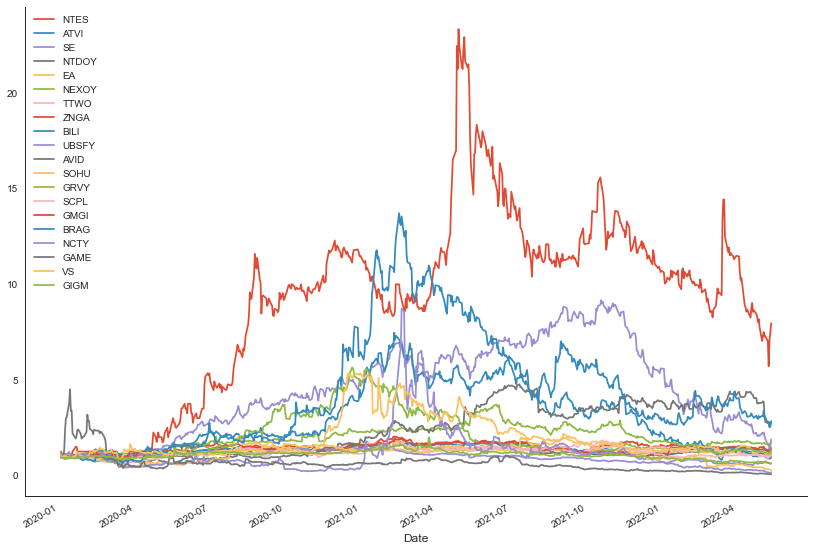

In [30]:
#Cumulative Log Return of Adj Close Price
#Log return
rets_adj = np.log(ticker_adj_close / ticker_adj_close.shift(1))
rets_adj.head().round(3)
rets_adj.cumsum().apply(np.exp).plot(figsize=(14, 10))

# Exploring the data for each company

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

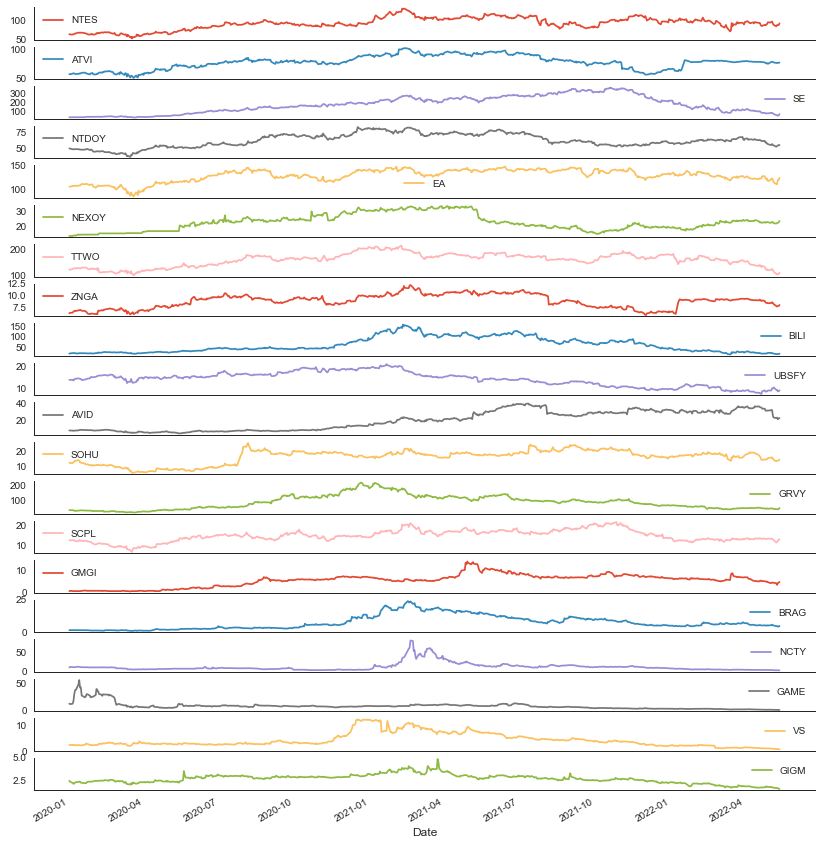

In [31]:
#The general changes for each company
ticker_adj_close.plot(figsize=(14, 16), subplots=True)

# Data for LSTM model
At the final step I will create an LSTM model and I picked the Sea Limited company, since it has some games in betting market.

In [2]:
start_date='2020-1-1'
end_date =  date.today().strftime("%Y-%m-%d")

stockname = 'Sea Limited'
symbol = 'SE'
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,41.000000,41.189999,39.459999,40.040001,40.040001,5857000
2020-01-03,39.439999,40.650002,39.400002,40.490002,40.490002,5237800
2020-01-06,40.070000,41.029999,40.028999,40.480000,40.480000,4049200
2020-01-07,40.500000,41.799999,40.349998,41.009998,41.009998,3947600
2020-01-08,41.000000,41.389000,40.055000,40.160000,40.160000,3200800
...,...,...,...,...,...,...
2022-05-09,72.750000,72.759003,62.529999,64.620003,64.620003,17459100
2022-05-10,66.519997,68.750000,62.000000,64.180000,64.180000,10371500
2022-05-11,63.500000,64.849998,56.689999,57.110001,57.110001,14385100


# Covid data

For the project I decided to use the date from the John Hopking University.

There will be visual explanation however I can give you a spoiler with the covid_analyisis_master.ipybn file where I did my initial researches.

In [11]:
#Data from University of John Hopkins

Confirmed_filepath = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
Death_filepath = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
Recovered_filepath = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [12]:
#Function to wide data into a long data via melt
def COVIDData(filepath):
       data = filepath
       data = pd.read_csv(data)
       data.rename(columns={'Province/State':'Province','Country/Region':'Country'},inplace = True)
       data=data.melt(id_vars=['Province', 'Country', 'Lat', 'Long'], 
                           var_name='Date', value_name='Count')
       return data

In [13]:
#Confirmed Cases
ConfirmedCases = COVIDData(Confirmed_filepath)
ConfirmedCases=ConfirmedCases.rename(columns={'Count':'Confirmed'})
#Death Cases
DeathCases = COVIDData(Death_filepath)
DeathCases=DeathCases.rename(columns={'Count':'Death'})
#Recovered Cases
RecoveredCases = COVIDData(Recovered_filepath)
RecoveredCases=RecoveredCases.rename(columns={'Count':'Recovered'})

In [14]:
#All date in a single data frame
covid_data = pd.merge(left=ConfirmedCases, right=DeathCases, how='left',
                      on=['Province', 'Country', 'Date', 'Lat', 'Long'])

#Recovery has a different row number, so I have to merge it after
covid_data = pd.merge(left=covid_data, right=RecoveredCases, how='left',
                      on=['Province', 'Country', 'Date', 'Lat', 'Long'])

In [15]:
# Time Series Preparation
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

# Recovered cases has null values
covid_data['Recovered'] = covid_data['Recovered'].fillna(0)

# convert to int datatype
covid_data['Recovered'] = covid_data['Recovered'].astype('int')

# Daily Data Creation
Since the Financial data is based on the daily progression, I applied the same strategy to the covid data.
So our model will try to detect the affect of daily covid cases (impled by Confirmed), deaths and recoveries

In [16]:
# The daily case numbers calculated by taking the difference from the previous day
covid_data_diff=covid_data.groupby('Date')['Confirmed', 'Death', 'Recovered'].sum()
covid_data_diff=covid_data_diff.diff()
covid_data_diff

C:\Users\mehme\AppData\Local\Temp/ipykernel_12712/4003994369.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Confirmed,Death,Recovered
Date,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,100.0,1.0,2.0
2020-01-24,287.0,8.0,7.0
2020-01-25,493.0,16.0,3.0
2020-01-26,683.0,14.0,14.0
...,...,...,...
2022-05-11,692805.0,2586.0,0.0
2022-05-12,597213.0,406.0,0.0
2022-05-13,549063.0,2150.0,0.0


In [17]:
#Merging Financial Data and Daily Covid Data

Financial_data_Covid_Data=pd.merge(left=df, right=covid_data_diff, how='left', on='Date')

Financial_data_Covid_Data=Financial_data_Covid_Data.dropna()
Financial_data_Covid_Data

,Open,High,Low,Close,Adj Close,Volume,Confirmed,Death,Recovered
Date,,,,,,,,,
2020-01-23,44.250000,45.009998,43.742001,44.750000,44.750000,4141600,100.0,1.0,2.0
2020-01-24,46.060001,46.500000,44.349998,45.330002,45.330002,5869400,287.0,8.0,7.0
2020-01-27,42.599998,44.450001,42.599998,44.349998,44.349998,3065600,809.0,26.0,9.0
2020-01-28,45.000000,45.310001,44.509998,45.029999,45.029999,1561300,2651.0,49.0,43.0
2020-01-29,45.759998,46.290001,45.029999,45.139999,45.139999,2059000,589.0,2.0,18.0
...,...,...,...,...,...,...,...,...,...
2022-05-09,72.750000,72.759003,62.529999,64.620003,64.620003,17459100,632994.0,1712.0,0.0
2022-05-10,66.519997,68.750000,62.000000,64.180000,64.180000,10371500,731408.0,2478.0,0.0
2022-05-11,63.500000,64.849998,56.689999,57.110001,57.110001,14385100,692805.0,2586.0,0.0


# Tweets and NLP Analyisis

We see that there is a coorrelation between covid cases and stock pricess. But what about the annoucements of world health organization?
As in the NLP.ipynb file I started scraping all the announcements of WHO posted in their official website: https://www.who.int/director-general/speeches/detail
However there are only 350 annoucements and this would cause a time stemp issue.
In order to tackle this problem we decided to go for the tweets of world health organization.

And this time I had a new problem. 
Even though I applied for an upgraded developer account in Twitter and got accepted, there is a limit in the search index.
There is no way to scrape tweets older than 7 days.

After doing some researches I found this dictionary called sntwitter.TwitterSearchScraper and used it to scrape all the data.
To use this library we have to go to the advance search link of Twitter and mimic the search criterias: https://twitter.com/search-advanced?lang=en

In [41]:
# In order to get the tweets from WHO we will use sntwitter.TwitterSearchScraper
# Otherwise we would need a special API key (for academic researches) from Twitter since search index has a 7 day limit


query = "(from:WHO) lang:en until:2022-05-12 since:2020-01-01"
tweets = []
limit = 100000

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.user.username, tweet.content])
        
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
df.to_csv('tweets_all_step_4.csv')

In [42]:
df_all_who_tweets=pd.read_csv("tweets_all_step_4.csv")


In [43]:
#There are currently 17,654 tweets however these are all tweets posted by WHO
#I will apply a simple mask to filter the tweets concerning corona virus
#I picked 3 important keywords: covid|corona|sars
mask = df_all_who_tweets['Tweet'].str.contains('covid|corona|sars', case=False, na=False)
df_all_who_tweets=df_all_who_tweets[mask]
df_all_who_tweets= df_all_who_tweets.astype(str).apply(lambda x: x.str.lower())

# Text Cleaning 
This process will be limited to the point of tokenization because I will use a pretrained model and it has its own tokenizer
For better performance I will use its own tokenizer.
They recommend not to use data cleaning in the process since the emojis might also have a weight in the analysis however after a couple of attemps I decided to break this rule because I noticed better results.
However I stick to the distilbert-base-uncased-finetuned-sst-2-english tokenizer.


In [44]:
#Removing Quatation, special signs and links
#I paid special attention to the signs @ and # since they will play a huge role in NLP process.
def remove_http_Quotation(text):
    text=re.sub(r"http\S+", "", text)
    text=re.sub(r"-@\S+", "", text)
    text=re.sub("-", " ", text)
    text=re.sub("'", " ", text)
    text=re.sub("#", " ", text)

    return text

df_all_who_tweets['Tweet_http_Quotation'] = df_all_who_tweets['Tweet'].apply(lambda x: remove_http_Quotation(x))


In [45]:
#Removing the punctuations
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text = re.sub('\n', '', text)
    text=re.sub(r"http\S+", "", text)

    return text

df_all_who_tweets['Tweet_punct'] = df_all_who_tweets['Tweet_http_Quotation'].apply(lambda x: remove_punct(x))

In [46]:
#Removing Emojis
def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        u"\u23F0"
                      "]+", re.UNICODE)
    text= re.sub(emoj, '', text)
    return text

df_all_who_tweets['Tweet_emoj'] = df_all_who_tweets['Tweet_punct'].apply(lambda x: remove_emojis(x))

In [47]:
#This is how it looks after cleaning
#The Tweet_emoj will be the column to use for our NLP
df_all_who_tweets.head(10)

,Unnamed: 0,Date,User,Tweet,Tweet_http_Quotation,Tweet_punct,Tweet_emoj
1,1,2022-05-11 16:05:07+00:00,who,live: q&amp;a on #covid19 updates with @drmike...,live: q&amp;a on covid19 updates with @drmike...,live qampa on covid updates with drmikeryan a...,live qampa on covid updates with drmikeryan a...
2,2,2022-05-11 11:23:21+00:00,who,#askwho live q&amp;a with dr @mvankerkhove &am...,askwho live q&amp;a with dr @mvankerkhove &am...,askwho live qampa with dr mvankerkhove amp dr...,askwho live qampa with dr mvankerkhove amp dr...
3,3,2022-05-11 10:19:07+00:00,who,it’s ⏰ for governments to fully fund the @acta...,it’s ⏰ for governments to fully fund the @acta...,it’s ⏰ for governments to fully fund the actac...,it’s for governments to fully fund the actacc...
5,5,2022-05-10 16:02:25+00:00,who,world leaders urged to make firm commitments f...,world leaders urged to make firm commitments f...,world leaders urged to make firm commitments f...,world leaders urged to make firm commitments f...
6,6,2022-05-10 14:27:21+00:00,who,@drtedros @drmikeryan @potus @actaccelerator @...,@drtedros @drmikeryan @potus @actaccelerator @...,drtedros drmikeryan potus actaccelerator medsp...,drtedros drmikeryan potus actaccelerator medsp...
11,11,2022-05-10 14:20:01+00:00,who,"@drtedros @drmikeryan @potus ""who is hoping to...","@drtedros @drmikeryan @potus ""who is hoping to...",drtedros drmikeryan potus who is hoping to see...,drtedros drmikeryan potus who is hoping to see...
12,12,2022-05-10 14:18:38+00:00,who,"@drtedros @drmikeryan @potus ""vaccination can ...","@drtedros @drmikeryan @potus ""vaccination can ...",drtedros drmikeryan potus vaccination can help...,drtedros drmikeryan potus vaccination can help...
13,13,2022-05-10 14:17:59+00:00,who,"@drtedros @drmikeryan @potus ""we encourage mem...","@drtedros @drmikeryan @potus ""we encourage mem...",drtedros drmikeryan potus we encourage member ...,drtedros drmikeryan potus we encourage member ...
16,16,2022-05-10 14:16:53+00:00,who,"@drtedros @drmikeryan @potus ""vaccination is t...","@drtedros @drmikeryan @potus ""vaccination is t...",drtedros drmikeryan potus vaccination is the b...,drtedros drmikeryan potus vaccination is the b...
20,20,2022-05-10 14:12:16+00:00,who,"@drtedros @drmikeryan @potus ""worst-case scena...","@drtedros @drmikeryan @potus ""worst case scena...",drtedros drmikeryan potus worst case scenarios...,drtedros drmikeryan potus worst case scenarios...


In [48]:
#Here I rename the cleaned column Tweet_emojis to Tweets
df_final=df_all_who_tweets[['Date','Tweet_emoj']]
df_final=df_final.rename(columns={"Tweet_emoj": "Tweets"})
df_final['Date'] = pd.to_datetime(df_final['Date'])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8899 entries, 1 to 17834
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    8899 non-null   datetime64[ns, UTC]
 1   Tweets  8899 non-null   object             
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 208.6+ KB


In [49]:
df_final=df_final.to_csv('tweets_all_step_4_cleaned.csv')

In [2]:
dateparse = lambda dates: datetime.strptime(dates[:10], '%Y-%m-%d')
df_final = pd.read_csv('tweets_all_step_4_cleaned.csv',  index_col='Date',
                 parse_dates = ['Date'], date_parser = dateparse
                )

# NLP analysis
Since I do not have access to the sentiments of the tweets, I had to go with a zero-shot Text classification strategy.
After searching pretrained models I decided to go with the DistilBERT-base-uncased model:

"This model is a fine-tune checkpoint of DistilBERT-base-uncased, fine-tuned on SST-2. This model reaches an accuracy of 91.3 on the dev set (for comparison, Bert bert-base-uncased version reaches an accuracy of 92.7)".

https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english?text=coronaviruses+are+a+large+family+of+viruses+that+are+known+to+cause+illness+ranging+from+the+common+cold+to+more+severe+diseases%2C+such+as+middle+east+respiratory+syndrome+%28mers%29+and+severe+acute+respiratory+syndrome+%28sars%29%5Cn%5Cn%23coronavirus+https%3A%2F%2Ft.co%2F87h5he32tl

The biggest problem after this was the empty days.
I had to find a way to fill them. Working with dateframe was a bit hectic.

In [69]:

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

In [70]:
#Function to apply model into the dataframe
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [71]:
#Application of the model to each tweet. BERT has a max length limit of tokens = 512
df_final['sentiment'] = df_final['Tweets'].apply(lambda x: sentiment_score(x[:512]))

In [72]:
#The model give 2 for positive posts and 1 for negative posts.
df_final.head(5)

,Unnamed: 0,Tweets,sentiment
Date,,,
2022-05-11,1,live qampa on covid updates with drmikeryan a...,1
2022-05-11,2,askwho live qampa with dr mvankerkhove amp dr...,1
2022-05-11,3,it’s for governments to fully fund the actacc...,2
2022-05-10,5,world leaders urged to make firm commitments f...,1
2022-05-10,6,drtedros drmikeryan potus actaccelerator medsp...,1


In [73]:
#I will assign 1 for positive, -1 for negative
#This way we can keep 0 for the missing days
df_final=df_final.replace({'sentiment': {2: 1, 1: -1}})
df_final

,Unnamed: 0,Tweets,sentiment
Date,,,
2022-05-11,1,live qampa on covid updates with drmikeryan a...,-1
2022-05-11,2,askwho live qampa with dr mvankerkhove amp dr...,-1
2022-05-11,3,it’s for governments to fully fund the actacc...,1
2022-05-10,5,world leaders urged to make firm commitments f...,-1
2022-05-10,6,drtedros drmikeryan potus actaccelerator medsp...,-1
...,...,...,...
2020-01-09,17802,novel coronaviruses emerge periodically as we ...,-1
2020-01-09,17803,a novel coronavirus is a new strain of the vi...,-1
2020-01-09,17804,some coronaviruses cause less severe disease s...,-1


In [74]:
# Here are total of missing days in the data frame, in order to prevent future issues I will fill them.
missing_days=pd.date_range(start = start_date, end = end_date ).difference(df_final.index)
len(missing_days)

90

In [75]:
#Filling the missing days
s = pd.Series(np.nan, index=pd.date_range(df_final.index.min(), df_final.index.max(), freq='D'))
df_final=pd.concat([df_final,s[~s.index.isin(df_final.index)]]).sort_index()
df_final=df_final.drop(columns=[0, 'Unnamed: 0'])

In [76]:
#I will turn the Nan values into 0s. 
#For this I will use np.NaN feature
df_final=df_final.replace({'Tweets': {np.NaN: 'No tweets'}, 'sentiment': {np.NaN: 0}})

In [77]:
#I will apply a simple function for readibilty of dataframe
def analysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'No Tweet'
    else:
        return 'Positive'

In [78]:
df_final['Result']=df_final['sentiment'].apply(analysis)
df_final.index.name='Date'
df_final

,Tweets,sentiment,Result
Date,,,
2020-01-05,chinese authorities informed who that they hav...,-1.0,Negative
2020-01-06,No tweets,0.0,No Tweet
2020-01-07,No tweets,0.0,No Tweet
2020-01-08,No tweets,0.0,No Tweet
2020-01-09,as surveillance improves around the world more...,-1.0,Negative
...,...,...,...
2022-05-10,drtedros drmikeryan potus actaccelerator medsp...,-1.0,Negative
2022-05-10,world leaders urged to make firm commitments f...,-1.0,Negative
2022-05-11,it’s for governments to fully fund the actacc...,1.0,Positive


In [79]:
#Since this operation takes time, I save the data frame as csv file
filepath = Path('who_tweets_sentiments_final_step_4.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)
df_final.to_csv(filepath)

In [9]:
dateparse = lambda dates: datetime.strptime(dates[:10], '%Y-%m-%d')
df_final = pd.read_csv('who_tweets_sentiments_final_step_4.csv',  index_col='Date',
                 parse_dates = ['Date'], date_parser = dateparse
                )

In [5]:
#As well as the missing days, there are days where WHO posted multiple tweets.
#I decided to use a groupby operation to summarize the general tendancy of their tweets.append
df_final_tweets_per_day=df_final.groupby('Date')['sentiment'].sum()

In [18]:
#Now I can merge this data with the dataframe consisted of Financial_data and Covid_Data
Financial_Data_Covid_Data_Tweet_Data=pd.merge(left=Financial_data_Covid_Data, right=df_final_tweets_per_day, how='left', on='Date')
Financial_Data_Covid_Data_Tweet_Data=Financial_Data_Covid_Data_Tweet_Data.dropna()
Financial_Data_Covid_Data_Tweet_Data


,Open,High,Low,Close,Adj Close,Volume,Confirmed,Death,Recovered,sentiment
Date,,,,,,,,,,
2020-01-23,44.250000,45.009998,43.742001,44.750000,44.750000,4141600,100.0,1.0,2.0,-14.0
2020-01-24,46.060001,46.500000,44.349998,45.330002,45.330002,5869400,287.0,8.0,7.0,0.0
2020-01-27,42.599998,44.450001,42.599998,44.349998,44.349998,3065600,809.0,26.0,9.0,-12.0
2020-01-28,45.000000,45.310001,44.509998,45.029999,45.029999,1561300,2651.0,49.0,43.0,6.0
2020-01-29,45.759998,46.290001,45.029999,45.139999,45.139999,2059000,589.0,2.0,18.0,-6.0
...,...,...,...,...,...,...,...,...,...,...
2022-05-05,87.419998,87.589996,79.750000,81.910004,81.910004,7219000,591518.0,2645.0,0.0,-4.0
2022-05-06,81.410004,81.900002,74.000000,76.199997,76.199997,9512700,628111.0,2310.0,0.0,0.0
2022-05-09,72.750000,72.759003,62.529999,64.620003,64.620003,17459100,632994.0,1712.0,0.0,1.0


In [84]:
filepath = Path('all_data_step_4_copy.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)
Financial_Data_Covid_Data_Tweet_Data.to_csv(filepath)

In [2]:
dateparse = lambda dates: datetime.strptime(dates[:10], '%Y-%m-%d')
Financial_Data_Covid_Data_Tweet_Data= pd.read_csv('all_data_step_4_copy.csv',  index_col='Date',
                 parse_dates = ['Date'], date_parser = dateparse
                )

# Data Analysis

Since these data's have too much flactations we decided to go with the 7-day average for making our analysis better.
Please note that I didn't feed the LSTM model with 7 day avareges. I used the regular data

In [3]:
dateparse = lambda dates: datetime.strptime(dates[:10], '%Y-%m-%d')
df_analysis= pd.read_csv('all_data_step_4_copy.csv',  index_col='Date',
                 parse_dates = ['Date'], date_parser = dateparse
                )

In [5]:
window = 7
df_analysis_7_day_average = df_analysis.rolling(window=window).mean()
df_analysis_7_day_average.head(50)

,Open,High,Low,Close,Adj Close,Volume,Confirmed,Death,Recovered,sentiment
Date,,,,,,,,,,
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-31,44.810000,45.537858,44.223142,45.061429,45.061429,3.003343e+06,1170.571429,23.714286,25.000000,-5.428571
2020-02-03,44.970000,45.750715,44.438571,45.292857,45.292857,2.890314e+06,1599.142857,32.714286,45.428571,-3.428571
2020-02-04,45.100000,45.837715,44.684285,45.505714,45.505714,2.600600e+06,2131.285714,41.000000,75.571429,-3.428571


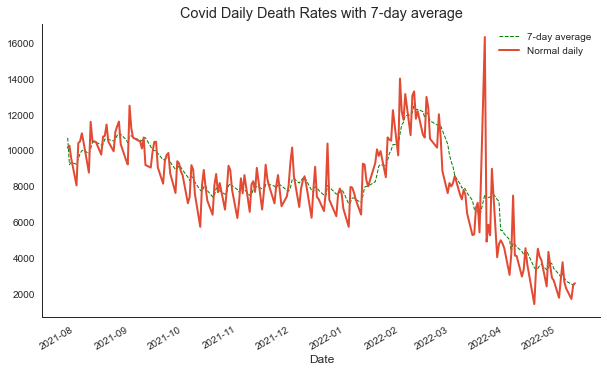

In [27]:
ax = df_analysis_7_day_average['Death'].iloc[-200:].plot(
 figsize=(10, 6), style=['g--'], lw=1) 
df_analysis['Death'].iloc[-200:].plot(ax=ax, lw=2.0)
ax.set_title('Covid Daily Death Rates with 7-day average')
ax.legend(('7-day average', 'Normal daily'), loc='upper right', shadow=True)

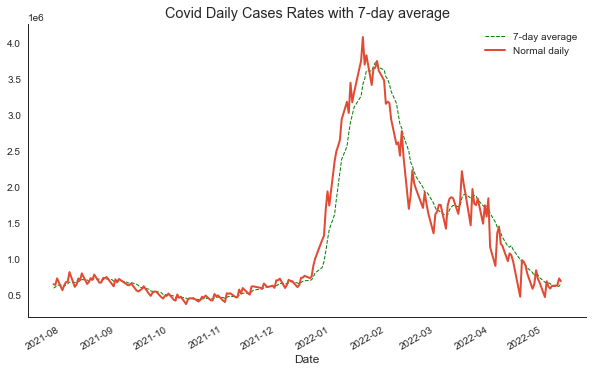

In [28]:
ax = df_analysis_7_day_average['Confirmed'].iloc[-200:].plot(
figsize=(10, 6), style=['g--'], lw=1) 
df_analysis['Confirmed'].iloc[-200:].plot(ax=ax, lw=2.0)
ax.set_title('Covid Daily Cases Rates with 7-day average')
ax.legend(('7-day average', 'Normal daily'), loc='upper right', shadow=True)

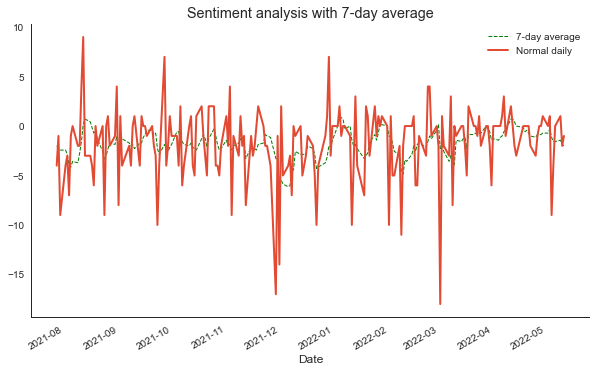

In [6]:
ax = df_analysis_7_day_average['sentiment'].iloc[-200:].plot(
figsize=(10, 6), style=['g--'], lw=1) 
df_analysis['sentiment'].iloc[-200:].plot(ax=ax, lw=2.0)
ax.set_title('Sentiment analysis with 7-day average')
ax.legend(('7-day average', 'Normal daily'), loc='upper right', shadow=True)

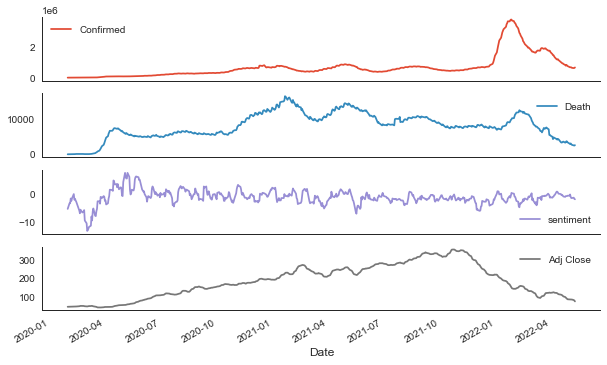

In [29]:
df_analysis_7_day_average[['Confirmed', 'Death', 'sentiment', 'Adj Close']].plot(subplots=True, figsize=(10, 6));

In [10]:
y=df_analysis_7_day_average['Adj Close'].dropna()
x=df_analysis_7_day_average[['Confirmed', 'Death', 'sentiment']].dropna()

# Interpretation
Each unit increase in Death cases causes an increase
Meanwhile each unit increase in sentiment causes a decrease

The confirmed cases also cause a decrease in the prices. In my opion it related to the death cases, because even though the cases increase deaths stays the same and this means death number loses its efficiency.
The second OLS regression aims to focus on this relationship. And our theory is confirmed, each unit increase in cases has a small upward impact on the death numbers

In [11]:
import statsmodels.api as sm
X=sm.add_constant(x)
linearmodel=sm.OLS(y, X).fit()
print(linearmodel.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     154.1
Date:                Tue, 17 May 2022   Prob (F-statistic):           3.67e-73
Time:                        17:01:26   Log-Likelihood:                -3235.6
No. Observations:                 575   AIC:                             6479.
Df Residuals:                     571   BIC:                             6497.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.5465      7.362      6.187      0.0

C:\Users\mehme\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [12]:
# Relation of death and covid cases
# This code aims to determine why Confirmed cases lose their impact on the stock price increase.
# The simple answer is that increasing covid cases vs stagnant death rates becomes a positive event.
# The stock prices increases when bad things happen!
y_death=df_analysis_7_day_average['Death'].dropna()
x_cases=df_analysis_7_day_average[['Confirmed']].dropna()

In [13]:
X_cases=sm.add_constant(x_cases)
linearmodel=sm.OLS(y_death, X_cases).fit()
print(linearmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  Death   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     60.17
Date:                Tue, 17 May 2022   Prob (F-statistic):           4.00e-14
Time:                        17:01:37   Log-Likelihood:                -5501.8
No. Observations:                 575   AIC:                         1.101e+04
Df Residuals:                     573   BIC:                         1.102e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7103.2549    198.611     35.765      0.0

C:\Users\mehme\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



# Date Targeted Correlation Analysis

I used this figure just to show the reverse correlation between stock pricess and tone of tweets

The negeative tweets causes an increase in the stock prices

I will clean the seasonal features of these two data in a Future update

In [9]:
df_analysis_7_day_average_date_targeted=df_analysis_7_day_average.loc['2020-08-01':'2021-08-01']

<AxesSubplot:xlabel='Date'>

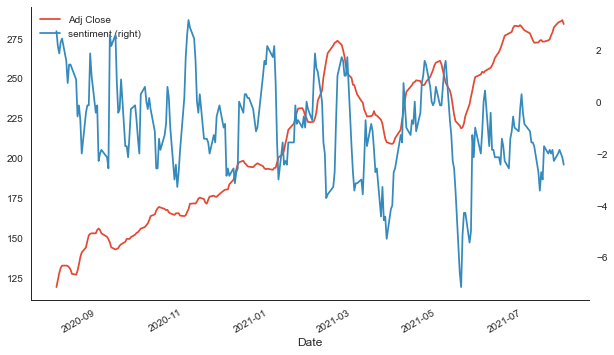

In [10]:
df_analysis_7_day_average_date_targeted[['Adj Close', 'sentiment']].plot(secondary_y='sentiment', figsize=(10, 6))

# Step #2 Exploring the Data withe covid and sentiment analyisis

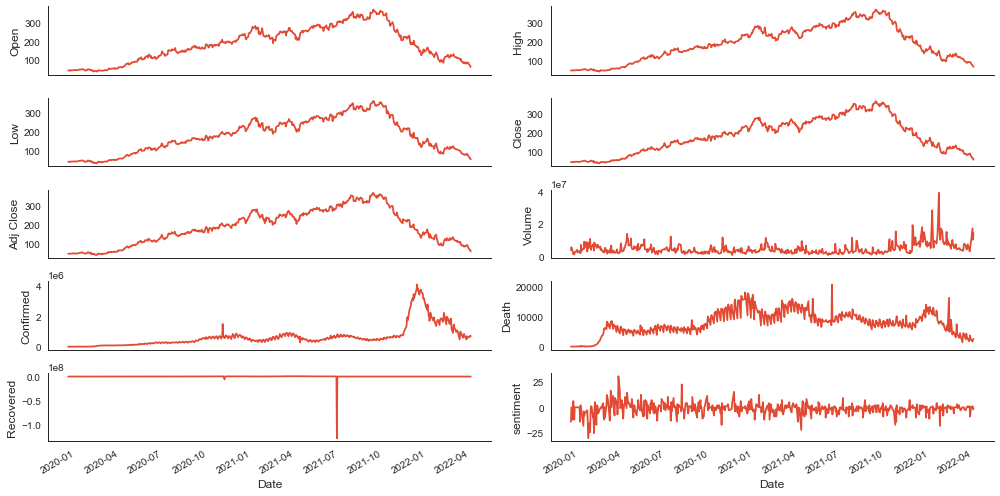

In [32]:
df_plot = Financial_Data_Covid_Data_Tweet_Data.copy()

ncols = 2
nrows = int(round(df_plot.shape[1] / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
for i, ax in enumerate(fig.axes):
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

In [33]:
Financial_Data_Covid_Data_Tweet_Data.iloc[-20]

Open         1.095400e+02
High         1.166000e+02
Low          1.075000e+02
Close        1.131700e+02
Adj Close    1.131700e+02
Volume       4.338200e+06
Confirmed    1.054060e+06
Death        4.545000e+03
Recovered    0.000000e+00
sentiment   -2.000000e+00
Name: 2022-04-13 00:00:00, dtype: float64

# Step #1 Preprocessing and Feature Selection

In [12]:
# Indexing Batches
train_df = Financial_Data_Covid_Data_Tweet_Data.sort_values(by=['Date']).copy()

# We safe a copy of the dates index, before we need to reset it to numbers
date_index = train_df.index

# Adding Month and Year in separate columns
# d = pd.to_datetime(train_df.index)
# train_df['Month'] = d.strftime("%m")
# train_df['Year'] = d.strftime("%Y") 

# We reset the index, so we can convert the date-index to a number-index
#train_df = train_df.reset_index(drop=True).copy()
train_df.iloc[-20]

Open         1.095400e+02
High         1.166000e+02
Low          1.075000e+02
Close        1.131700e+02
Adj Close    1.131700e+02
Volume       4.338200e+06
Confirmed    1.054060e+06
Death        4.545000e+03
Recovered    0.000000e+00
sentiment   -2.000000e+00
Name: 2022-04-13 00:00:00, dtype: float64

In [13]:
# List of considered Features
FEATURES = ['Open','High', 'Low', 'Close', 'Adj Close', 'Volume', 'Confirmed', 'Death', 'Recovered', 'sentiment'
            #, 'Month', 'Year', 'Adj Close'
            # I ran the code with the dates to investigate the impact of the features on different dates. I will do that in a future update
           ]

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['Adj Close']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Confirmed', 'Death', 'Recovered', 'sentiment']


,Open,High,Low,Close,Adj Close,Volume,Confirmed,Death,Recovered,sentiment,Prediction
Date,,,,,,,,,,,
2022-05-05,87.419998,87.589996,79.750000,81.910004,81.910004,7219000,590058.0,2655.0,0.0,-4.0,81.910004
2022-05-06,81.410004,81.900002,74.000000,76.199997,76.199997,9512700,628092.0,2307.0,0.0,0.0,76.199997
2022-05-09,72.750000,72.759003,62.529999,64.620003,64.620003,17459100,633606.0,1713.0,0.0,1.0,64.620003
2022-05-10,66.519997,68.750000,62.000000,64.180000,64.180000,10371500,731473.0,2485.0,0.0,-2.0,64.180000
2022-05-11,63.500000,64.849998,56.689999,57.110001,57.110001,14385100,694009.0,2591.0,0.0,-1.0,57.110001


In [14]:


# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['Adj Close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)
np_data_scaled



(581, 10)


array([[1.85296821e-02, 1.87159362e-02, 2.50284702e-02, ...,
        0.00000000e+00, 9.94288520e-01, 2.66666667e-01],
       [2.39831361e-02, 2.31778204e-02, 2.68997512e-02, ...,
        3.37772631e-04, 9.94288558e-01, 5.00000000e-01],
       [1.35583006e-02, 1.70389956e-02, 2.15136441e-02, ...,
        1.20633082e-03, 9.94288574e-01, 3.00000000e-01],
       ...,
       [1.04398919e-01, 1.01811712e-01, 8.28537107e-02, ...,
        8.26095348e-02, 9.94288504e-01, 5.16666667e-01],
       [8.56281954e-02, 8.98065534e-02, 8.12224934e-02, ...,
        1.19861031e-01, 9.94288504e-01, 4.66666667e-01],
       [7.65290793e-02, 7.81278046e-02, 6.48795013e-02, ...,
        1.24975873e-01, 9.94288504e-01, 4.83333333e-01]])

In [15]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 1

# Prediction Index
index_Close = data.columns.get_loc("Adj Close")

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 10 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(464, 1, 10) (464,)
(116, 1, 10) (116,)
0.022280318698549878
0.022280318698549878


# Step #2 Model Training

In [7]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

10 1 10


In [8]:
#The path of the saved model
checkpoint_filepath = r"C:\Users\mehme\Desktop\concordiabootcampnewpc\finalproject\archive\modelsaves\model1save.ckpt"
#model checkpoint callback object is created with this path
checkpoint_dir=os.path.dirname(checkpoint_filepath)

In [9]:
# Training the model
epochs = 50
batch_size = 16
#early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

cp_callback  = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        verbose=1)

history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    callbacks=[cp_callback])

Epoch 1/50
15/29 [==============>...............] - ETA: 0s - loss: 0.2897  
Epoch 1: saving model to C:\Users\mehme\Desktop\concordiabootcampnewpc\finalproject\archive\modelsaves\model1save.ckpt
29/29 [==============================] - 4s 22ms/step - loss: 0.2568 - val_loss: 0.0811
Epoch 2/50
15/29 [==============>...............] - ETA: 0s - loss: 0.1726
Epoch 2: saving model to C:\Users\mehme\Desktop\concordiabootcampnewpc\finalproject\archive\modelsaves\model1save.ckpt
29/29 [==============================] - 0s 5ms/step - loss: 0.1444 - val_loss: 0.0246
Epoch 3/50
29/29 [==============================] - ETA: 0s - loss: 0.0530
Epoch 3: saving model to C:\Users\mehme\Desktop\concordiabootcampnewpc\finalproject\archive\modelsaves\model1save.ckpt
29/29 [==============================] - 0s 6ms/step - loss: 0.0530 - val_loss: 0.0442
Epoch 4/50
29/29 [==============================] - ETA: 0s - loss: 0.0316
Epoch 4: saving model to C:\Users\mehme\Desktop\concordiabootcampnewpc\finalpro

In [35]:
model.save('saved_model_last/my_model')


INFO:tensorflow:Assets written to: saved_model_last/my_model\assets


INFO:tensorflow:Assets written to: saved_model_last/my_model\assets


In [16]:
model = tf.keras.models.load_model('saved_model_last/my_model')

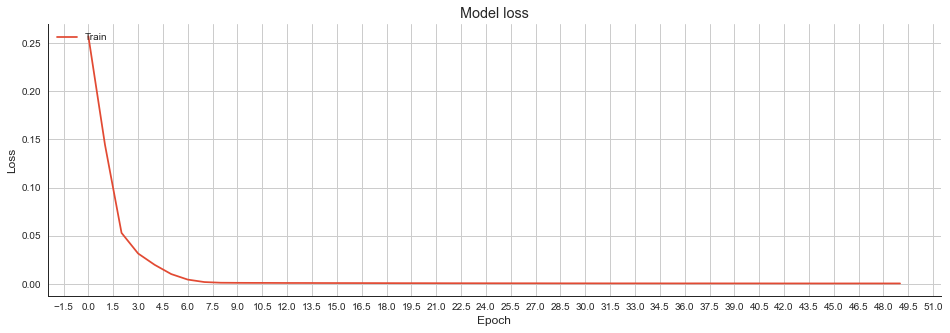

In [10]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
sns.lineplot(data=history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

In [11]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Median Absolute Error (MAE): 8.6
Mean Absolute Percentage Error (MAPE): 6.02 %
Median Absolute Percentage Error (MDAPE): 5.08 %


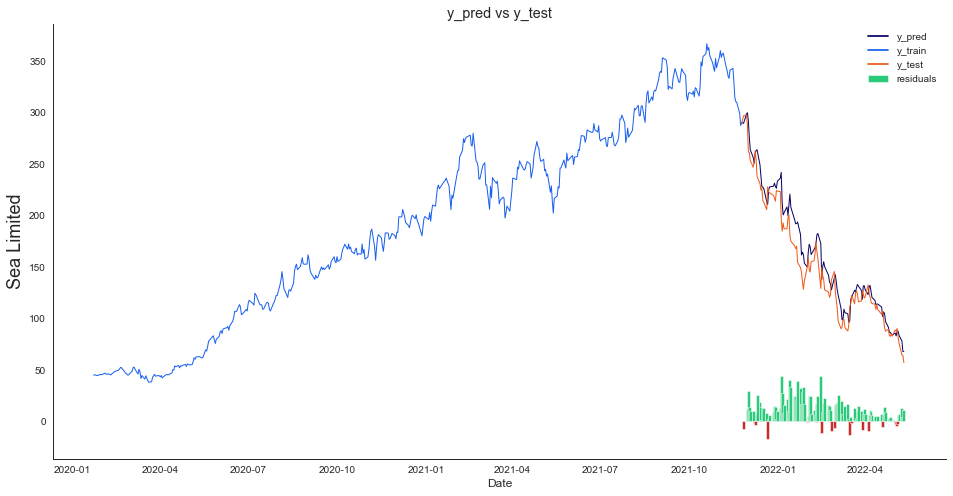

In [52]:
# The date from which on the date is displayed
display_start_date = "2020-01-01" 

# Add the difference between the valid and predicted prices
train = pd.DataFrame(data_filtered_ext['Close'][:train_data_len + 1]).rename(columns={'Close': 'y_train'})
valid = pd.DataFrame(data_filtered_ext['Close'][train_data_len:]).rename(columns={'Close': 'y_test'})
valid.insert(1, "y_pred", y_pred, True)
valid.insert(1, "residuals", valid["y_pred"] - valid["y_test"], True)
df_union = pd.concat([train, valid])

# Zoom in to a closer timeframe
df_union_zoom = df_union[df_union.index > display_start_date]

# Create the lineplot
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("y_pred vs y_test")
plt.ylabel(stockname, fontsize=18)
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df_union_zoom[['y_pred', 'y_train', 'y_test']], linewidth=1.0, dashes=False, ax=ax1)

# Create the bar plot with the differences
df_sub = ["#2BC97A" if x > 0 else "#C92B2B" for x in df_union_zoom["residuals"].dropna()]
ax1.bar(height=df_union_zoom['residuals'].dropna(), x=df_union_zoom['residuals'].dropna().index, width=3, label='residuals', color=df_sub)
plt.legend()
plt.show()

# Step #3 Model Prediction

In [18]:
df_temp = Financial_Data_Covid_Data_Tweet_Data.iloc[[-3]]
new_df = df_temp.filter(FEATURES)


# Get the last N day closing price values and scale the data to be values between 0 and 1
last_N_days = new_df[-sequence_length:].values
last_N_days_scaled = scaler.transform(last_N_days)

# Create an empty list and Append past N days
X_test_new = []
X_test_new.append(last_N_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
pred_price_scaled = model.predict(np.array(X_test_new))
pred_price_unscaled = scaler_pred.inverse_transform(pred_price_scaled.reshape(-1, 1))

# Print last price and predicted price for the next day
price_today = np.round(new_df['Adj Close'][-1], 2)
predicted_price = np.round(pred_price_unscaled.ravel()[0], 2)
change_percent = np.round(100 - (price_today * 100)/predicted_price, 2)

plus = '+'; minus = ''
print(f'The close price for the entered day was {price_today}')
print(f'The predicted close price for the next day is {predicted_price} ({plus if change_percent > 0 else minus}{change_percent}%)')

The close price for the entered day was 64.62
The predicted close price for the next day is 61.61000061035156 (-4.89%)


In [26]:
# Verifying the 
Financial_Data_Covid_Data_Tweet_Data.iloc[[-3]]
24855041503906

,Open,High,Low,Close,Adj Close,Volume,Confirmed,Death,Recovered,sentiment
Date,,,,,,,,,,
2022-05-09,72.75,72.759003,62.529999,64.620003,64.620003,17459100,633606.0,1713.0,0.0,1.0


In [27]:
# The sentiment reduced and the price increased as expected in our theory.
# It is impoosible to predict the future price with LSTM model because we cannot foresee the future anncouncements

Financial_Data_Covid_Data_Tweet_Data.iloc[[-2]]

,Open,High,Low,Close,Adj Close,Volume,Confirmed,Death,Recovered,sentiment
Date,,,,,,,,,,
2022-05-10,66.519997,68.75,62.0,64.18,64.18,10371500,731473.0,2485.0,0.0,-2.0


In [11]:
df_temp = Financial_Data_Covid_Data_Tweet_Data.iloc[[-4]]
df_temp

,Open,High,Low,Close,Adj Close,Volume,Confirmed,Death,Recovered,sentiment
Date,,,,,,,,,,
2022-05-06,81.410004,81.900002,74.0,76.199997,76.199997,9512700,628092.0,2307.0,0.0,0.0
